<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(1_6)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,30.203197,-23.925063,16.278134,41.127522,-24.849388
1,0.0,1.0,32.335674,-36.512736,5.822938,43.600649,-37.777711
2,0.0,2.0,61.115128,0.101608,71.216736,76.977444,-5.760708
3,0.0,3.0,97.470168,57.816386,165.286554,119.139978,46.146576
4,0.0,4.0,99.663572,-58.711052,50.952521,121.683766,-70.731245
...,...,...,...,...,...,...,...
59995,999.0,55.0,80.906811,-19.461796,71.445015,87.776282,-16.331268
59996,999.0,56.0,30.519684,19.930822,60.450506,40.330650,20.119856
59997,999.0,57.0,65.889738,-23.356579,52.533158,73.635874,-21.102716
59998,999.0,58.0,44.683706,25.410705,80.094412,53.667807,26.426605


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    30.203197 -23.925063   16.278134   41.127522 -24.849388
      1.0    32.335674 -36.512736    5.822938   43.600649 -37.777711
      2.0    61.115128   0.101608   71.216736   76.977444  -5.760708
      3.0    97.470168  57.816386  165.286554  119.139978  46.146576
      4.0    99.663572 -58.711052   50.952521  121.683766 -70.731245
...                ...        ...         ...         ...        ...
999.0 55.0   80.906811 -19.461796   71.445015   87.776282 -16.331268
      56.0   30.519684  19.930822   60.450506   40.330650  20.119856
      57.0   65.889738 -23.356579   52.533158   73.635874 -21.102716
      58.0   44.683706  25.410705   80.094412   53.667807  26.426605
      59.0   44.436882  22.763518   77.200400   53.435391  23.765008

[60000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    30.203197 -23.925063   16.278134   41.127522 -24.849388
      1.0    32.335674 -36.512736    5.822938   43.600649 -37.777711
      2.0    61.115128   0.101608   71.216736   76.977444  -5.760708
      3.0    97.470168  57.816386  165.286554  119.139978  46.146576
      4.0    99.663572 -58.711052   50.952521  121.683766 -70.731245
...                ...        ...         ...         ...        ...
999.0 55.0   80.906811 -19.461796   71.445015   87.776282 -16.331268
      56.0   30.519684  19.930822   60.450506   40.330650  20.119856
      57.0   65.889738 -23.356579   52.533158   73.635874 -21.102716
      58.0   44.683706  25.410705   80.094412   53.667807  26.426605
      59.0   44.436882  22.763518   77.200400   53.435391  23.765008

[60000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,30.203197,-23.925063,16.278134,41.127522,-24.849388
1,0.0,1.0,32.335674,-36.512736,5.822938,43.600649,-37.777711
2,0.0,2.0,61.115128,0.101608,71.216736,76.977444,-5.760708
3,0.0,3.0,97.470168,57.816386,165.286554,119.139978,46.146576
4,0.0,4.0,99.663572,-58.711052,50.952521,121.683766,-70.731245
...,...,...,...,...,...,...,...
59995,999.0,55.0,80.906811,-19.461796,71.445015,87.776282,-16.331268
59996,999.0,56.0,30.519684,19.930822,60.450506,40.330650,20.119856
59997,999.0,57.0,65.889738,-23.356579,52.533158,73.635874,-21.102716
59998,999.0,58.0,44.683706,25.410705,80.094412,53.667807,26.426605


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    30.203197 -23.925063   16.278134   41.127522 -24.849388
      1.0    32.335674 -36.512736    5.822938   43.600649 -37.777711
      2.0    61.115128   0.101608   71.216736   76.977444  -5.760708
      3.0    97.470168  57.816386  165.286554  119.139978  46.146576
      4.0    99.663572 -58.711052   50.952521  121.683766 -70.731245
...                ...        ...         ...         ...        ...
999.0 55.0   80.906811 -19.461796   71.445015   87.776282 -16.331268
      56.0   30.519684  19.930822   60.450506   40.330650  20.119856
      57.0   65.889738 -23.356579   52.533158   73.635874 -21.102716
      58.0   44.683706  25.410705   80.094412   53.667807  26.426605
      59.0   44.436882  22.763518   77.200400   53.435391  23.765008

[60000 rows x 5 columns]

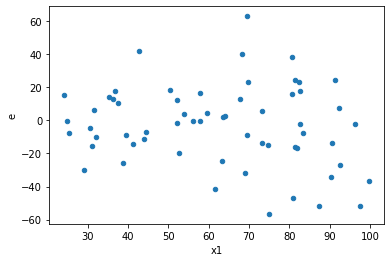

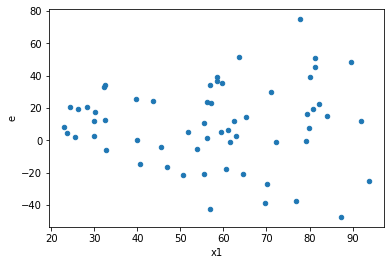

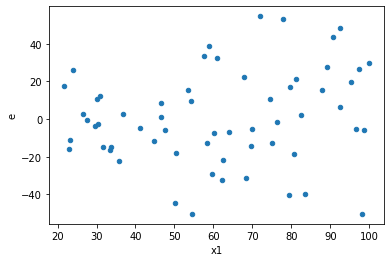

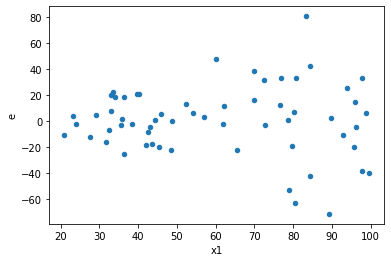

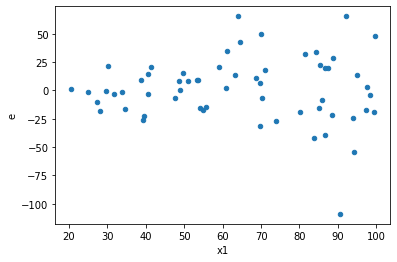

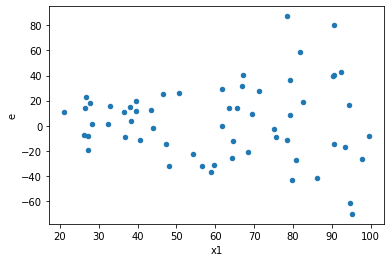

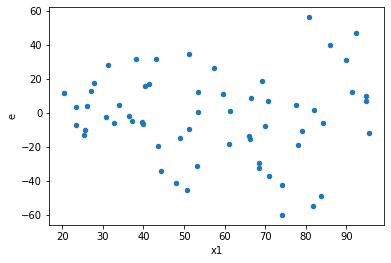

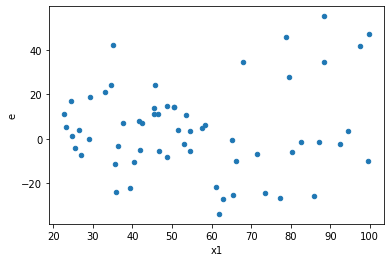

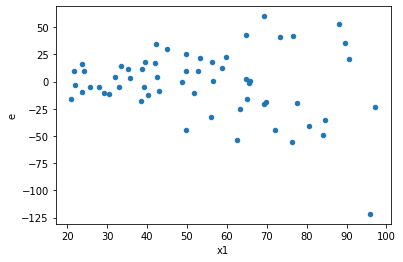

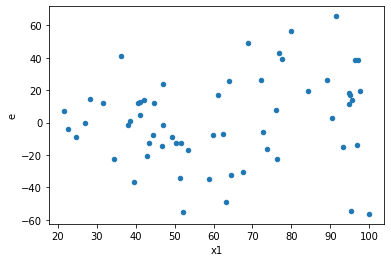

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,24.0,34.0,6432.859740253729,26055.799737131056,268.035822510572,766.3470510920898,2.859121754376183,0.005032123237913799,0.9974839383810431,0.0025160616189568996,Reject005=0 : Heteroscedasticity
2.0,30.0,28.0,14300.05380096778,20672.274313907143,476.66846003225936,738.2955112109694,1.5488658745346902,0.24787323348414914,0.8760633832579254,0.12393661674207457,Reject005=1 : Homoscedasticity
4.0,32.0,26.0,13499.867271926129,32810.34561804209,421.8708522476915,1261.9363699246958,2.991285990016157,0.005436302673656135,0.9972818486631719,0.0027181513368280674,Reject005=0 : Heteroscedasticity
7.0,22.0,36.0,9069.606586996584,41191.28994226872,412.2548448634811,1144.2024983963533,2.7754737455547867,0.006364232691227656,0.9968178836543862,0.003182116345613828,Reject005=0 : Heteroscedasticity
8.0,27.0,31.0,8714.050553638195,26020.72792984999,322.74261309771094,839.3783203177416,2.6007669463332324,0.011252142749234695,0.9943739286253827,0.005626071374617347,Reject005=0 : Heteroscedasticity
9.0,25.0,33.0,12048.328956997602,24195.821167390248,481.9331582799041,733.2067020421288,1.521386709848021,0.25704162765609473,0.8714791861719526,0.12852081382804736,Reject005=1 : Homoscedasticity
11.0,20.0,38.0,4004.7427583439776,31641.675062011524,200.23713791719888,832.675659526619,4.158447669537422,0.0001573469392801563,0.9999213265303599,7.867346964007815e-05,Reject005=0 : Heteroscedasticity
12.0,29.0,29.0,11540.828268811521,23202.0901511954,397.9595954762594,800.0720741791517,2.01043543936078,0.06489889200161025,0.9675505539991949,0.03244944600080513,Reject005=1 : Homoscedasticity
15.0,24.0,34.0,6449.124514662631,46872.38519322779,268.7135214442763,1378.5995645066996,5.13036916451777,1.7573353135125203e-05,0.9999912133234324,8.786676567562601e-06,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,26.0,32.0,46738.89632607833,15179.585579898947,1797.6498586953203,474.3620493718421,0.26387900128455477,0.0008455559060153597,Reject005=0 : Heteroscedasticity
1.0,24.0,34.0,6432.859740253729,26055.799737131056,268.035822510572,766.3470510920898,2.859121754376183,0.005032123237913799,Reject005=0 : Heteroscedasticity
2.0,30.0,28.0,14300.05380096778,20672.274313907143,476.66846003225936,738.2955112109694,1.5488658745346902,0.24787323348414914,Reject005=1 : Homoscedasticity
3.0,35.0,23.0,37320.68763362029,6300.586973988148,1066.3053609605797,273.9385640864412,0.2569044235505522,0.0003074443754684487,Reject005=0 : Heteroscedasticity
4.0,32.0,26.0,13499.867271926129,32810.34561804209,421.8708522476915,1261.9363699246958,2.991285990016157,0.005436302673656135,Reject005=0 : Heteroscedasticity
5.0,27.0,31.0,38552.21846048665,14968.36666112152,1427.859942980987,482.8505374555329,0.33816379528616164,0.00542315175747756,Reject005=0 : Heteroscedasticity
6.0,25.0,33.0,23422.50639191613,6992.1016090604835,936.9002556766452,211.88186694122678,0.22615200034095637,0.0002684042921783397,Reject005=0 : Heteroscedasticity
7.0,22.0,36.0,9069.606586996584,41191.28994226872,412.2548448634811,1144.2024983963533,2.7754737455547867,0.006364232691227656,Reject005=0 : Heteroscedasticity
8.0,27.0,31.0,8714.050553638195,26020.72792984999,322.74261309771094,839.3783203177416,2.6007669463332324,0.011252142749234695,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    819
Reject005=1 : Homoscedasticity      181
Name: Result_test, dtype: int64